# Notebook : Module 07 Predictive
# Author Name : Uma M Subramanian
# Date : 10/04/2023

# Part 1 - Linear Regression

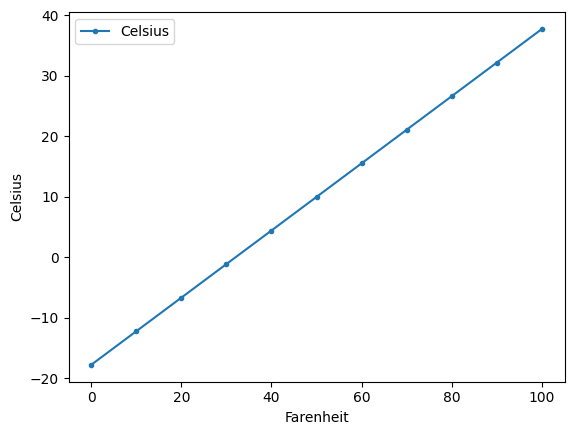

In [1]:
import pandas as pd

c = lambda f: 5/9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x ='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

Section 1 - Load

In [17]:
nyc = pd.read_csv('Data/ave_hi_nyc_jan_1895-2018.csv')

Section 2 - View

In [18]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

Section 3 - Clean

In [19]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


Section 4 - Describe

In [20]:
pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

Section 5: Calculate

In [21]:
from scipy import stats

linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
linear_regression.slope, linear_regression.intercept

(0.014771361132966163, 8.694993233674289)

Section 6: Predict

In [22]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

Section 7: Plot

(10.0, 70.0)

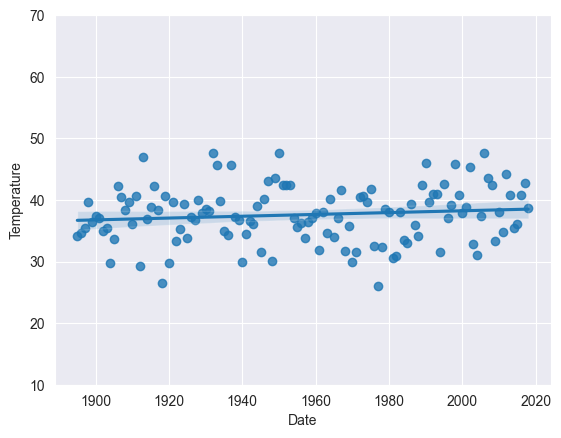

In [35]:
import seaborn as sns
sns.set_style("darkgrid")
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

# Part 2 - Machine Learning

Section 1: Split Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values, random_state=11)

X_train.shape, X_test.shape

((93, 1), (31, 1))

Section 2: Training

In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

linear_regression.coef_, linear_regression.intercept_

(array([0.01939167]), -0.30779820252656975)

Section 2: Testing

In [26]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected:{e:.2f}')

predicted: 37.86, expected:31.70
predicted: 38.69, expected:34.80
predicted: 37.00, expected:39.40
predicted: 37.25, expected:45.70
predicted: 38.05, expected:32.30
predicted: 37.64, expected:33.80
predicted: 36.94, expected:39.70


Section 3: Predict

In [27]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2030)

array([39.05729859])

In [32]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2040)

array([39.25121532])

In [30]:
predict = (lambda x: linear_regression.coef_*x+linear_regression.intercept_)

predict(2050)

array([39.44513205])

Section 4: Plot

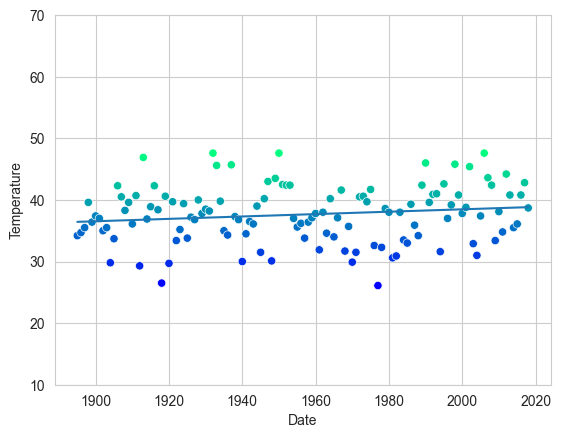

In [31]:
import numpy as np
import matplotlib.pyplot as plt

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x,y)

Section 5: Conclusion

The part 1 and part 2 are great basis to learn about machine learning. It will explained how it will easy for ML to predict the weather in future 

# Part 3 : Bonus

Section 1: Load

In [36]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [37]:
print(california)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

Section 2: Describe Dataset

In [38]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Section 3: Exploring with Pandas

In [39]:
pd.set_option('display.precision', 4)

pd.set_option('display.width', None)

california_df = pd.DataFrame(california.data, columns= california.feature_names)
california_df['MedHouseValue'] = pd.Series(california.target)

california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422


Section 4: Describe

In [40]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


Section 5: Visualizing

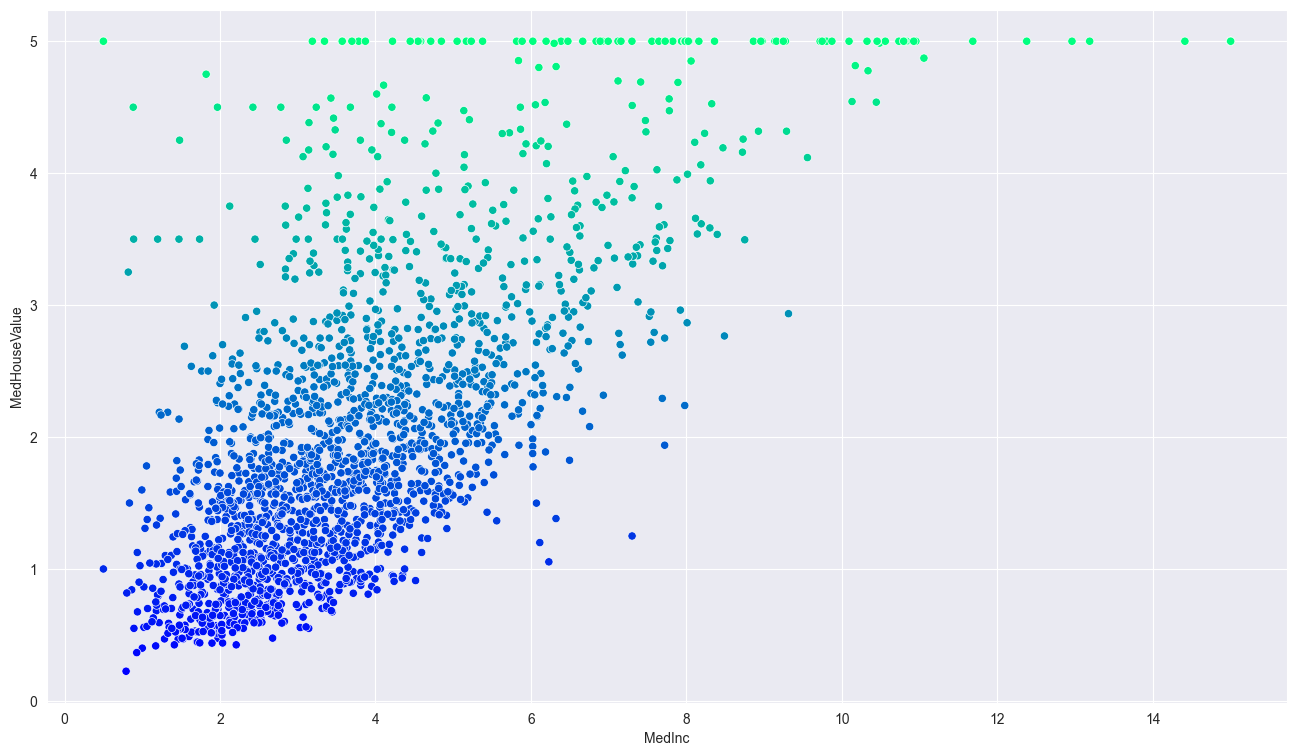

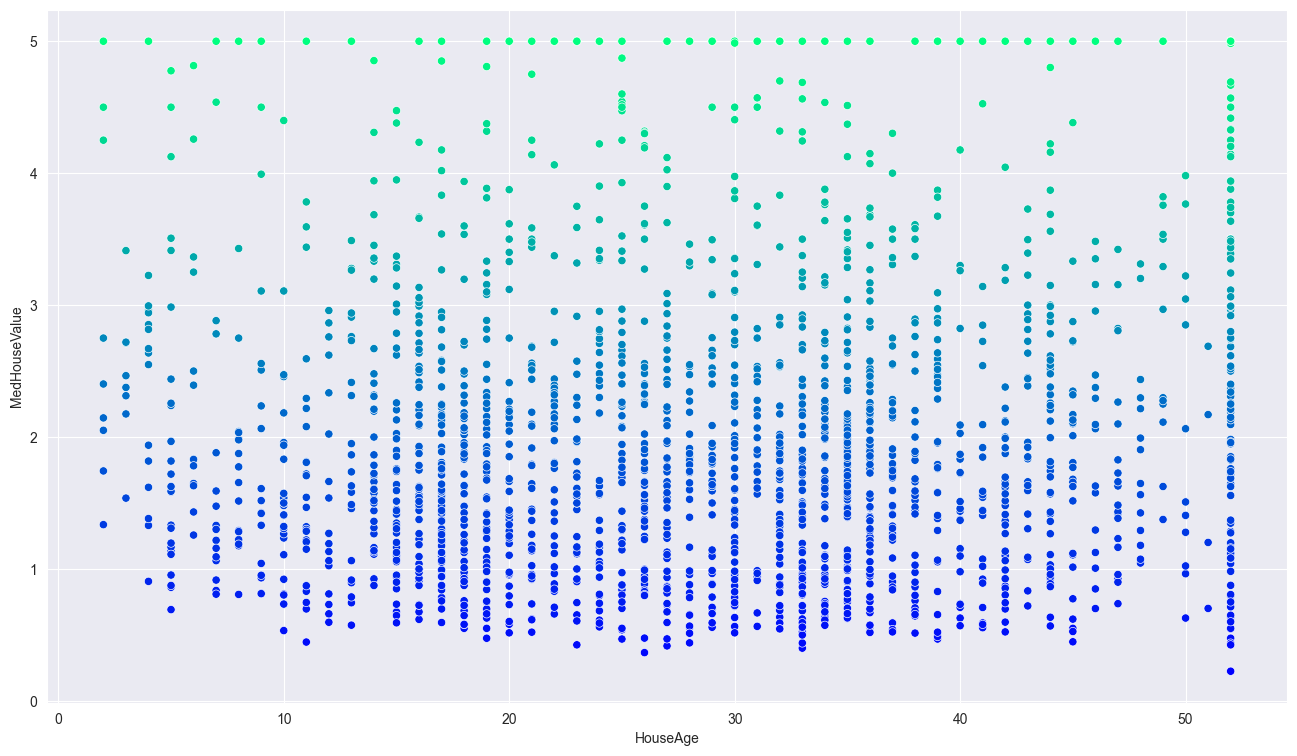

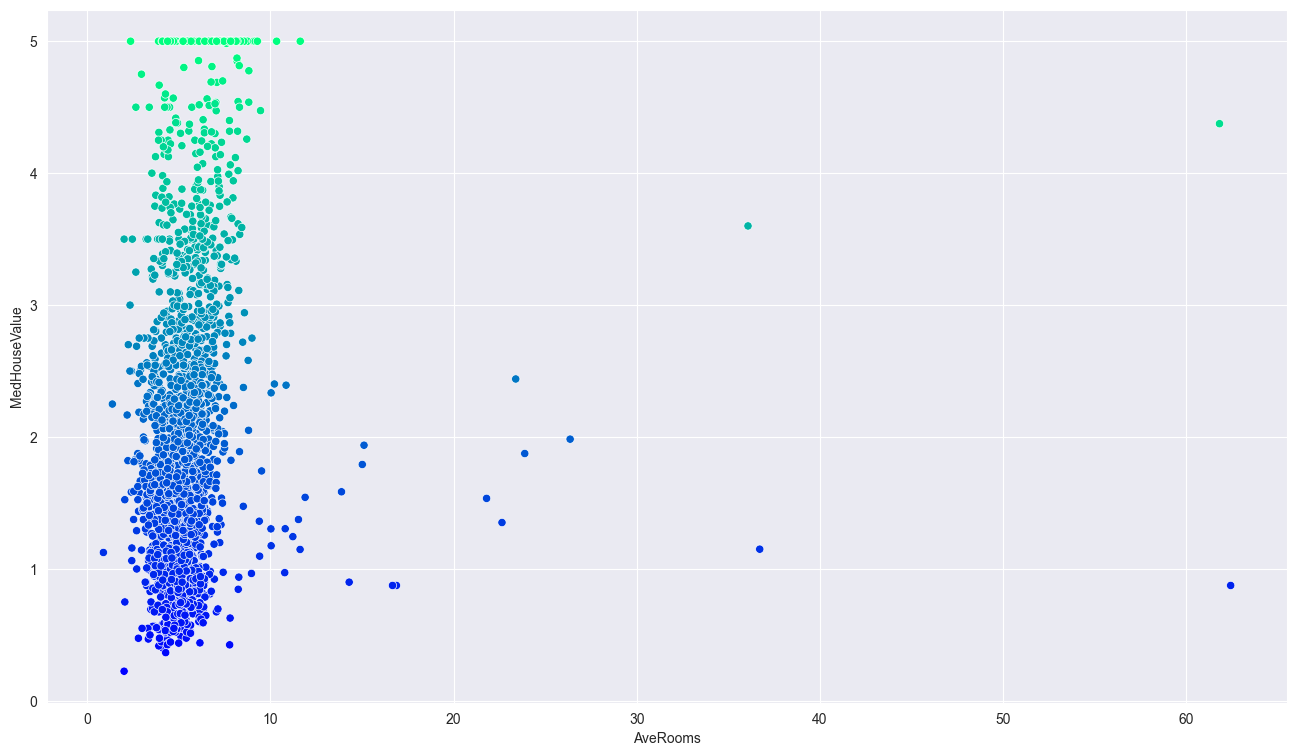

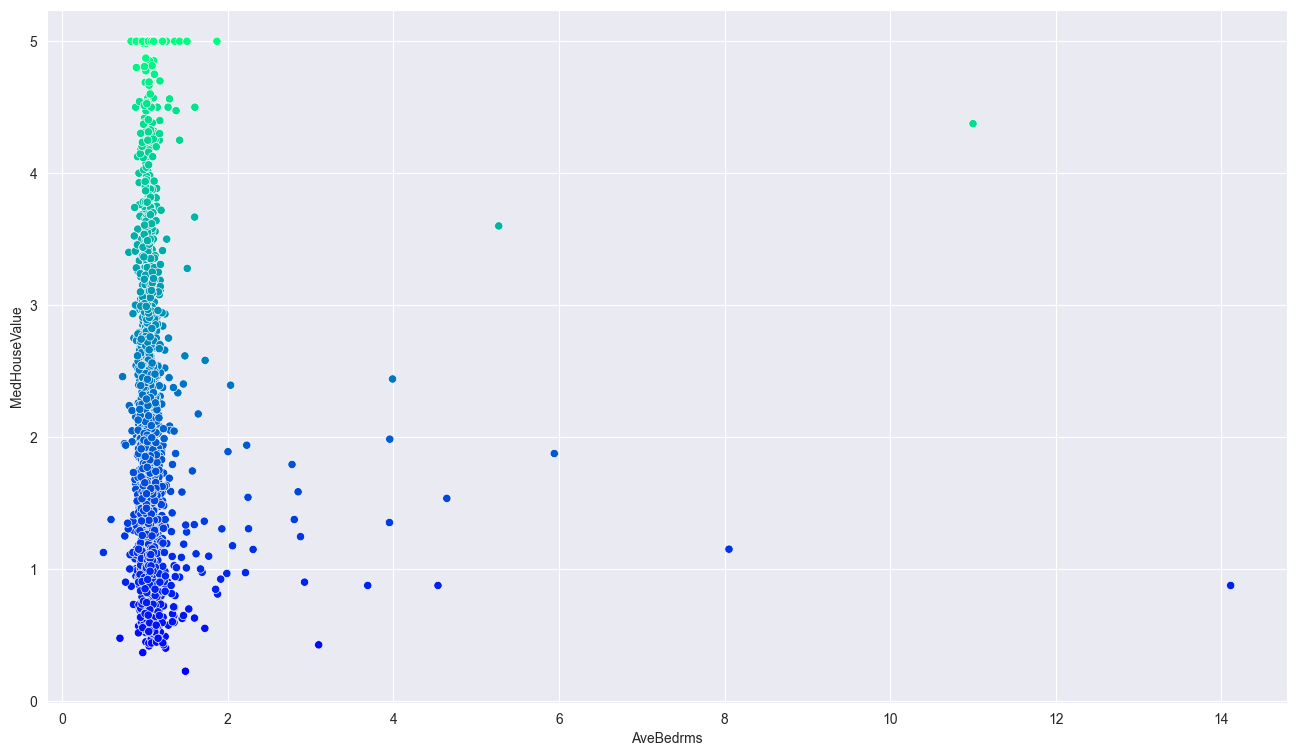

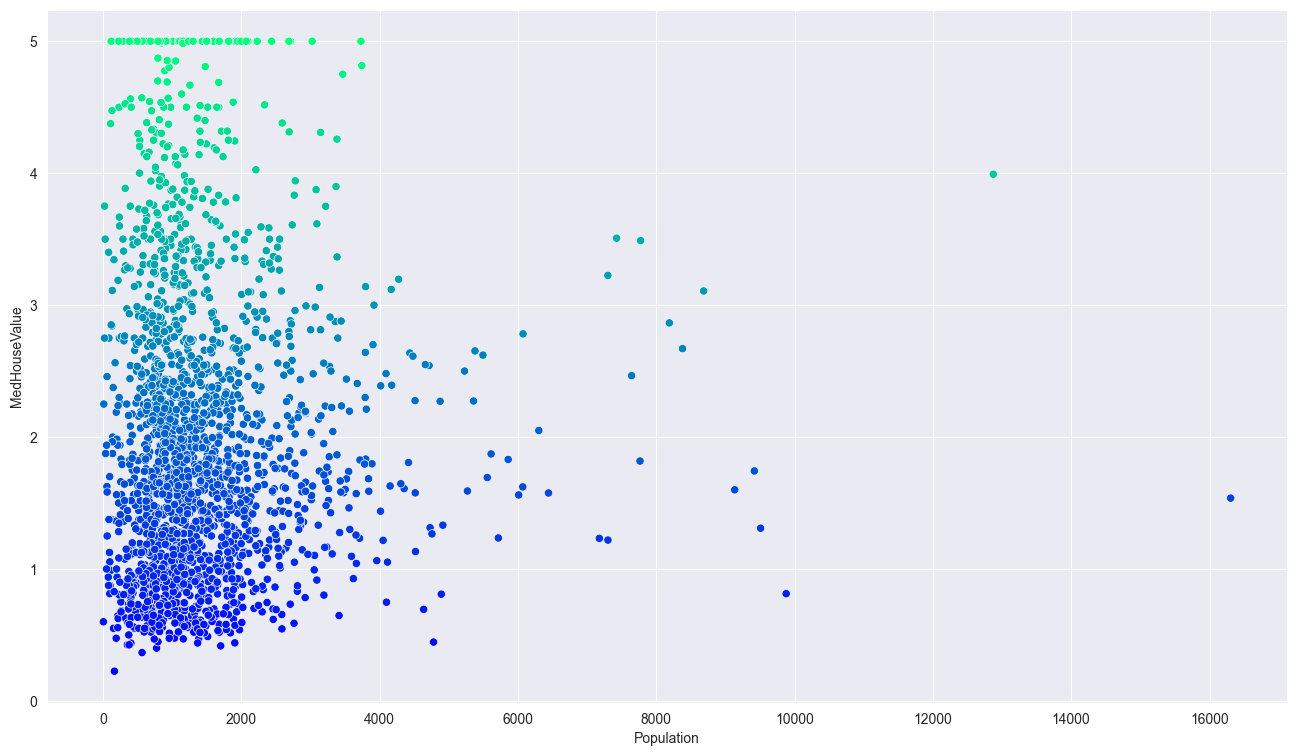

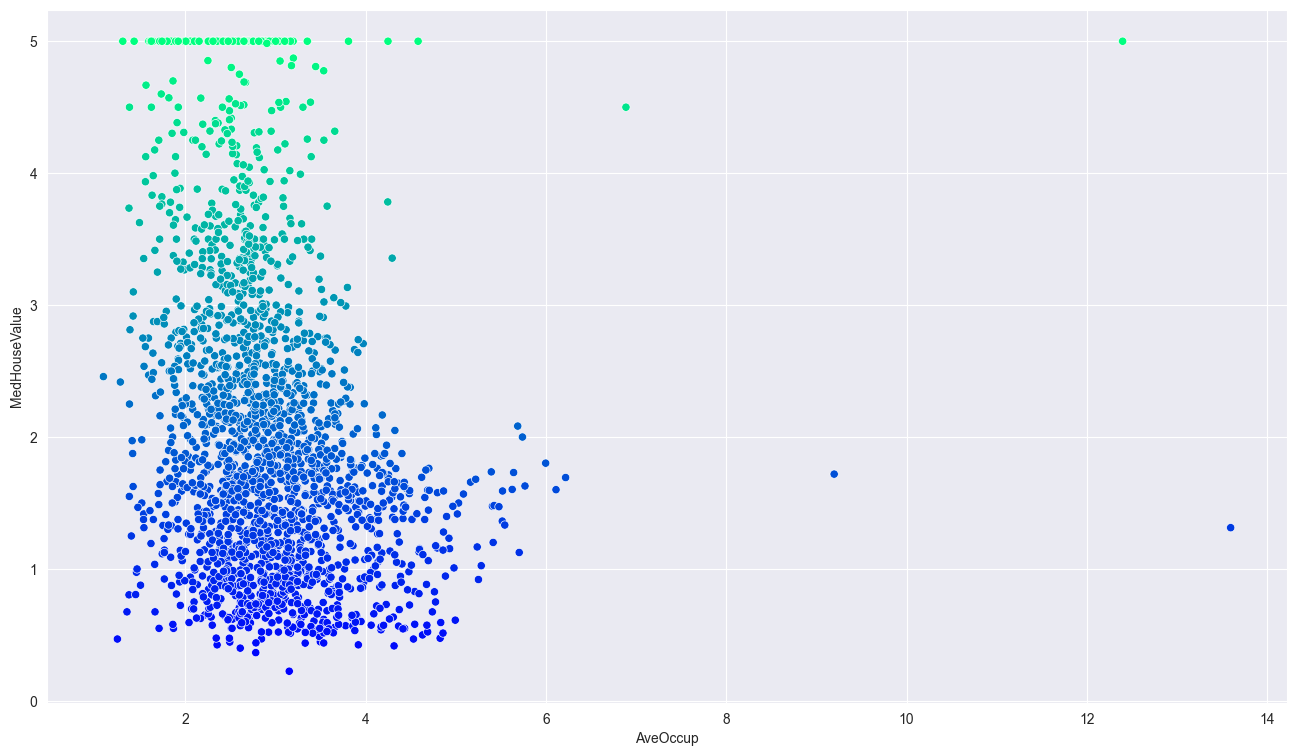

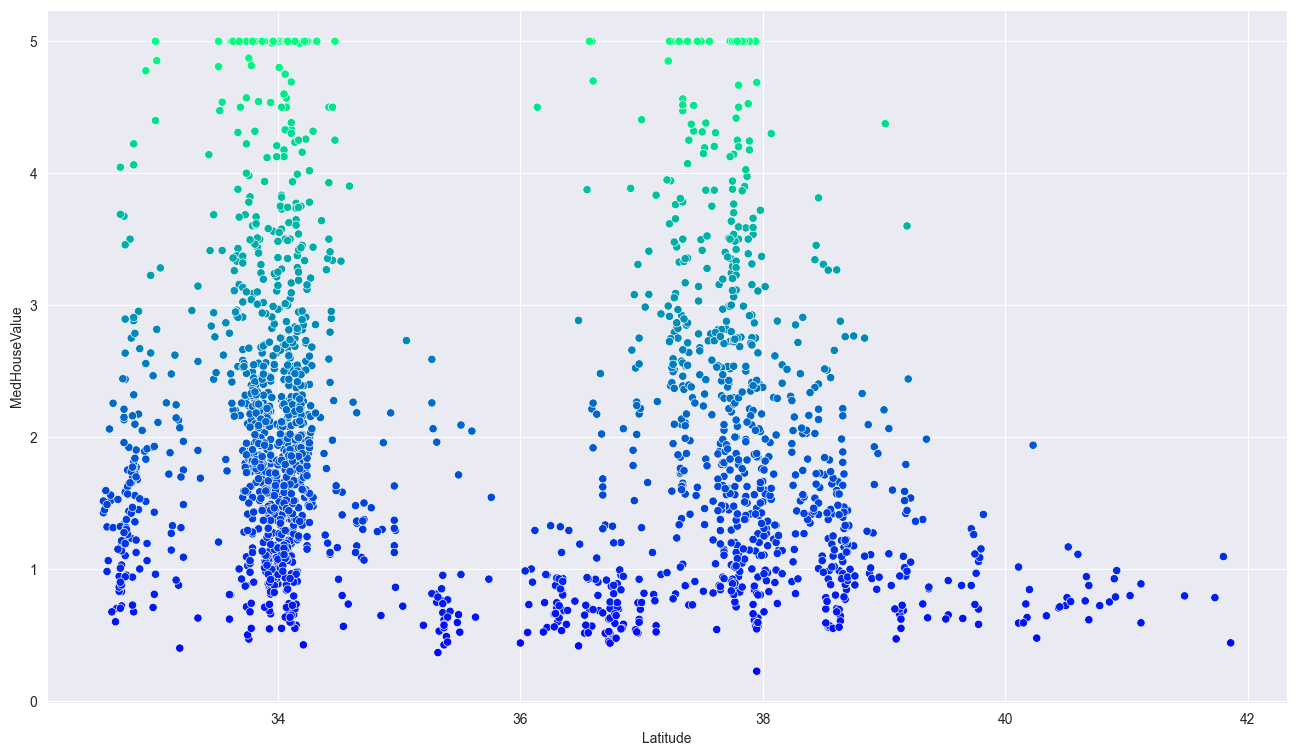

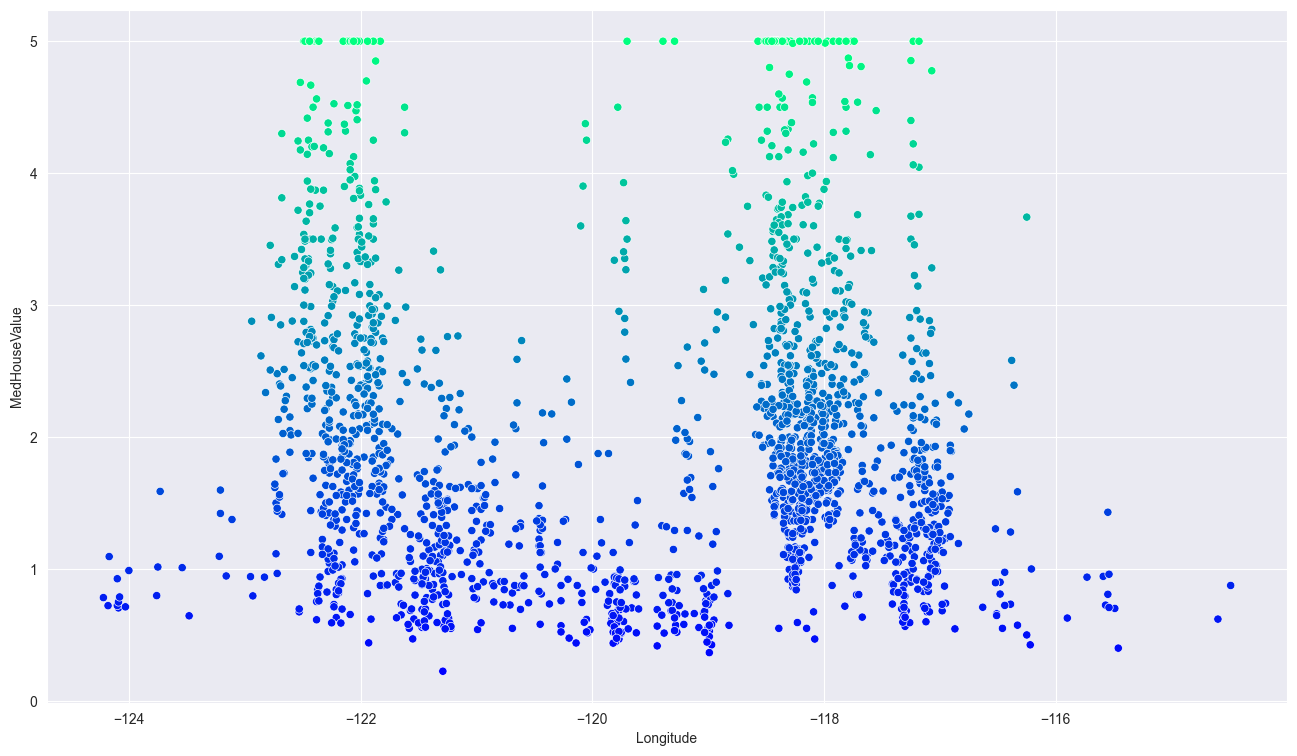

In [43]:
sample_df = california_df.sample(frac= 0.1, random_state=17)

sns.set_style('darkgrid')
for feature in california.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=feature, y='MedHouseValue', hue='MedHouseValue', palette='winter',legend=False)